### Huggingface version of Llava 1.6 with Mistral 7b 

In [ ]:
!pip install transformers==4.38.1 accelerate --upgrade --quiet

The LLaVa model was proposed in Visual Instruction Tuning and improved in Improved Baselines with Visual Instruction Tuning by Haotian Liu, Chunyuan Li, Yuheng Li and Yong Jae Lee. 

The Huggingface SDK is provided here https://huggingface.co/docs/transformers/en/model_doc/llava

This notebook has been tested on Amazon SageMaker Notebook Instances with single GPU on ml.g5.2xlarge

In [1]:
from transformers import AutoProcessor, LlavaForConditionalGeneration
import torch 

model_id = "llava-hf/llava-v1.6-mistral-7b-hf"

# you can also load from local file
#model_id = "llava-model/models--llava-hf--llava-v1.6-mistral-7b-hf/snapshots/4dbf61a5df5b38ec222b3acb12a947b5cef29312"

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = LlavaForConditionalGeneration.from_pretrained(model_id, torch_dtype=torch.float16, device_map=device)
processor = AutoProcessor.from_pretrained(model_id)

cuda


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Some weights of the model checkpoint at llava-hf/llava-v1.6-mistral-7b-hf were not used when initializing LlavaForConditionalGeneration: ['image_newline']
- This IS expected if you are initializing LlavaForConditionalGeneration from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LlavaForConditionalGeneration from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [2]:
print(processor)

LlavaProcessor:
- image_processor: CLIPImageProcessor {
  "crop_size": {
    "height": 336,
    "width": 336
  },
  "do_center_crop": true,
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_aspect_ratio": "anyres",
  "image_grid_pinpoints": [
    [
      336,
      672
    ],
    [
      672,
      336
    ],
    [
      672,
      672
    ],
    [
      1008,
      336
    ],
    [
      336,
      1008
    ]
  ],
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "CLIPImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "processor_class": "LlavaProcessor",
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 336
  }
}

- tokenizer: LlamaTokenizerFast(name_or_path='llava-hf/llava-v1.6-mistral-7b-hf', vocab_size=32000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='left', truncation_side='

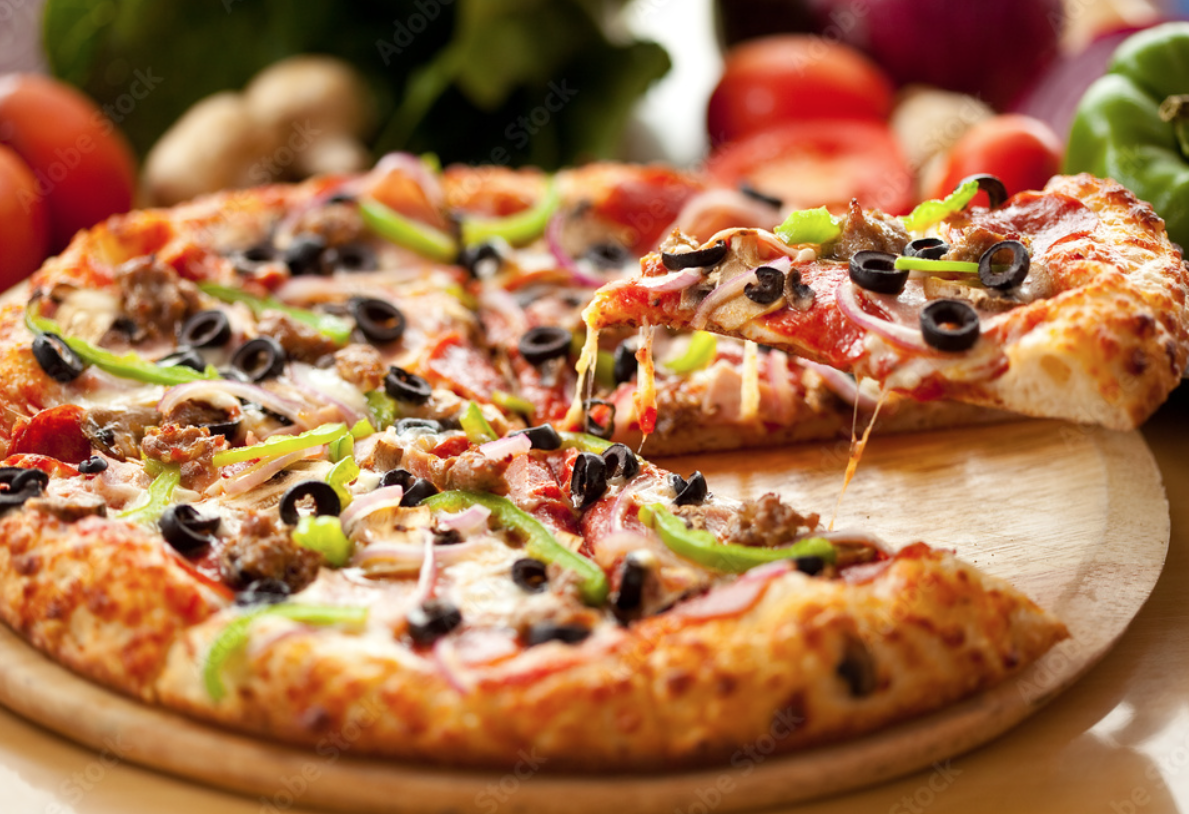

In [3]:
from PIL import Image

prompt = "<image>\nUSER: What's the content of the image in details?\nASSISTANT:"
image = Image.open("food.png")
inputs = processor(text=prompt, images=image, return_tensors="pt")
inputs = inputs.to(device)
display(image)

In [4]:
# Generate
generate_ids = model.generate(**inputs,max_new_tokens = 300)
processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

"\nUSER: What's the content of the image in details?\nASSISTANT: The image shows a close-up view of a pizza with various toppings. The pizza has a golden-brown crust and is generously covered with melted cheese. The toppings include black olives, green peppers, and what appears to be sausage. The pizza is sliced and ready to be served. In the background, there are other food items, including a tomato and some garlic bread, suggesting that this might be a meal from a restaurant or a pizzeria. The image is a high-resolution photograph with a focus on the pizza, making the details of the toppings and the texture of the crust quite clear. "